In this project we will learn about:

Upsampling and Downsampling time series data

The difference between interpolation and etrapolation

How to fill-in missing pixels in an image (corrupted images)

## Down- & Upsampling Time Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate
from matplotlib.patches import Rectangle

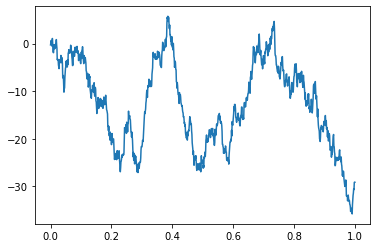

In [2]:
n = 1000
timevec = np.arange(n)/n

tso = np.cumsum(np.random.randn(n))
plt.plot(timevec, tso);

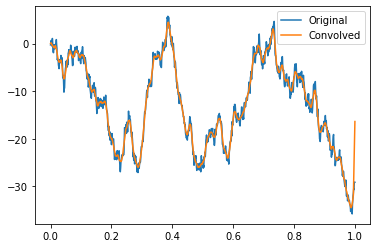

In [3]:
# Apply mean-smoothing filter
k = 11
ts = np.convolve(tso, np.ones(k)/k, mode="same")
plt.plot(timevec, tso, label = "Original")
plt.plot(timevec,ts, label = "Convolved")
plt.legend()
plt.show()

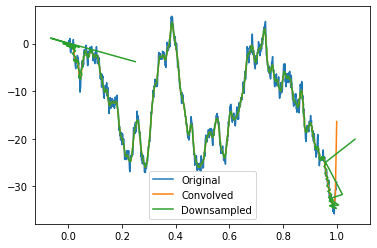

In [4]:
# Downsampling
ts_ds = signal.resample(ts, int(n/2))
timevec_ds = signal.resample(timevec, int(n/2))
plt.plot(timevec, tso, label = "Original")
plt.plot(timevec,ts, label = "Convolved")
plt.plot(timevec_ds,ts_ds, label = "Downsampled")
plt.legend()
plt.show()

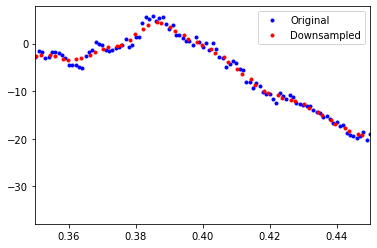

In [5]:
plt.plot(timevec, tso, "b.", label = "Original")
#plt.plot(timevec,ts, label = "Convolved")
plt.plot(timevec_ds,ts_ds, "r.", label = "Downsampled")
plt.legend()
plt.xlim([0.35, 0.45])
plt.show()

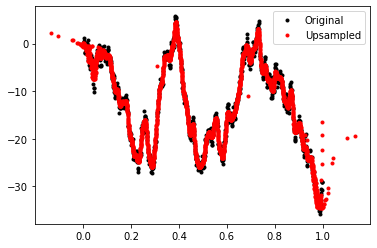

In [6]:
# Upsample
ts_us = signal.resample(ts, n*3)
timevec_us = signal.resample(timevec, n*3)
plt.plot(timevec, tso, "k.", label = "Original")
#plt.plot(timevec,ts, label = "Convolved")
#plt.plot(timevec_ds,ts_ds, label = "Downsampled")
plt.plot(timevec_us,ts_us, "r.", label = "Upsampled")
plt.legend()
plt.show()

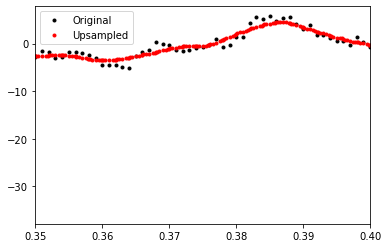

In [7]:
plt.plot(timevec, tso, "k.", label = "Original")
#plt.plot(timevec,ts, label = "Convolved")
#plt.plot(timevec_ds,ts_ds, label = "Downsampled")
plt.plot(timevec_us,ts_us, "r.", label = "Upsampled")
plt.legend()
plt.xlim([0.35, 0.40])
plt.show()

## 1D Interpolation

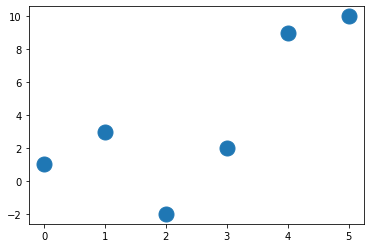

In [8]:
# Interpolation and upsampling are related
# Create a 6-point time series
sig = np.array([1,3,-2,2,9,10])
plt.plot(sig, "o", markersize = 15)
plt.show()

In [9]:
# interpolate by a factor of 2 using numpy
interp_factor = 2
interp_points = np.linspace(0,len(sig)-1, len(sig)*interp_factor)
orig_points = np.arange(len(sig))
interp_sig = np.interp(interp_points,orig_points, sig)

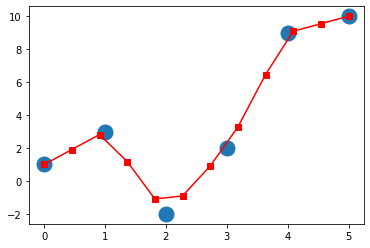

In [10]:
plt.plot(sig, "o", markersize = 15)
plt.plot(interp_points, interp_sig, "rs-")
plt.show()

In [11]:
# Interpolate by a factor of 2 using Scipy
# We create a function for interpolation and then we run iterpolation
interp_funL = interpolate.interp1d(orig_points, sig, kind="linear")
interp_funL

In [12]:
interp_sigL = interp_funL(interp_points)

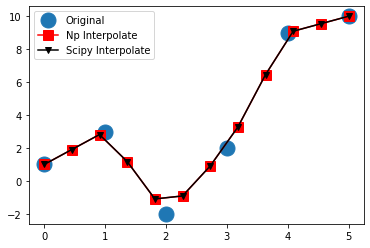

In [13]:
plt.plot(sig, "o", markersize = 15, label = "Original")
plt.plot(interp_points, interp_sig, "rs-", 
         markersize=10, label="Np Interpolate")
plt.plot(interp_points, interp_sigL, "kv-", label="Scipy Interpolate")
plt.legend()
plt.show()

In [14]:
# Cubic Interpolation
interp_funC = interpolate.interp1d(orig_points, sig, kind="cubic")
interp_sigC = interp_funC(interp_points)

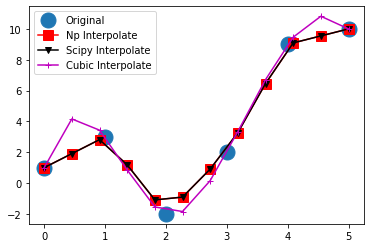

In [15]:
plt.plot(sig, "o", markersize = 15, label = "Original")
plt.plot(interp_points, interp_sig, "rs-", 
         markersize=10, label="Np Interpolate")
plt.plot(interp_points, interp_sigL, "kv-", label="Scipy Interpolate")
plt.plot(interp_points, interp_sigC, "m+-", label="Cubic Interpolate")
plt.legend()
plt.show()

## 1D Extrapolation

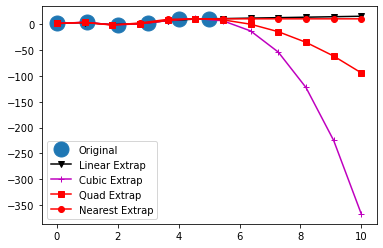

In [16]:
# Numpy cannot do extrapolation so we have to use Scipy
extrap_points = np.linspace(0, (len(sig)-1)*2, int(len(sig)*interp_factor))
orig_points = np.arange(len(sig))

interp_funL = interpolate.interp1d(orig_points, sig, kind="linear",
                                   bounds_error=False, fill_value="extrapolate")
interp_sigL = interp_funL(extrap_points)

interp_funC = interpolate.interp1d(orig_points, sig, kind="cubic",
                                  bounds_error=False, fill_value="extrapolate")
interp_sigC = interp_funC(extrap_points)

interp_funQ = interpolate.interp1d(orig_points, sig, kind="quadratic",
                                  bounds_error=False, fill_value="extrapolate")
interp_sigQ = interp_funQ(extrap_points)

interp_funN = interpolate.interp1d(orig_points, sig, kind="nearest",
                                  bounds_error=False, fill_value="extrapolate")
interp_sigN = interp_funN(extrap_points)

plt.plot(orig_points, sig, "o", markersize = 15, label = "Original")
plt.plot(extrap_points, interp_sigL, "kv-", label="Linear Extrap")
plt.plot(extrap_points, interp_sigC, "m+-", label="Cubic Extrap")
plt.plot(extrap_points, interp_sigQ, "rs-", label="Quad Extrap")
plt.plot(extrap_points, interp_sigN, "ro-", label="Nearest Extrap")
plt.legend()
plt.show()
# Bottom Line: Never Trust Economists about their extrapolations

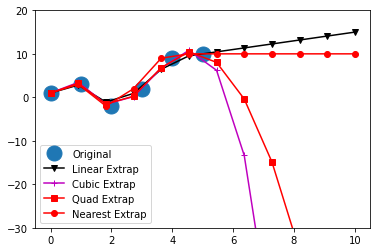

In [17]:
# Magnify
plt.plot(orig_points, sig, "o", markersize = 15, label = "Original")
plt.plot(extrap_points, interp_sigL, "kv-", label="Linear Extrap")
plt.plot(extrap_points, interp_sigC, "m+-", label="Cubic Extrap")
plt.plot(extrap_points, interp_sigQ, "rs-", label="Quad Extrap")
plt.plot(extrap_points, interp_sigN, "ro-", label="Nearest Extrap")
plt.ylim([-30, 20])
plt.legend()
plt.show()

## Revisiting Resampling

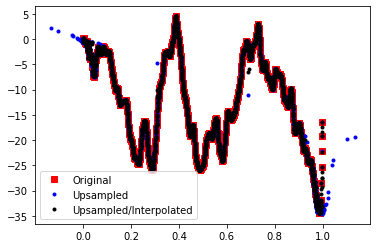

In [18]:
# Combine Upsampling with interpolation to create regularly upsampled version
interp_funL = interpolate.interp1d(timevec_us, ts_us) #linear is default

timevec_usRegular = np.linspace(timevec[0], timevec[-1], len(timevec_us))

ts_usRegular = interp_funL(timevec_usRegular)

plt.plot(timevec, ts, "rs", label="Original")
plt.plot(timevec_us, ts_us, "b.", label="Upsampled")
plt.plot(timevec_usRegular, ts_usRegular, "k.", label="Upsampled/Interpolated")
plt.legend()
plt.show()

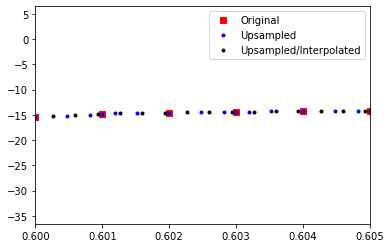

In [19]:
plt.plot(timevec, ts, "rs", label="Original")
plt.plot(timevec_us, ts_us, "b.", label="Upsampled")
plt.plot(timevec_usRegular, ts_usRegular, "k.", label="Upsampled/Interpolated")
plt.legend()
plt.xlim([0.6, 0.605])
plt.show()

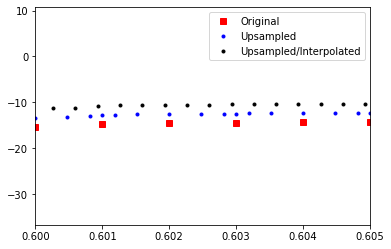

In [20]:
# Add y-axis offsets to see more clearly
plt.plot(timevec, ts, "rs", label="Original")
plt.plot(timevec_us, ts_us +2, "b.", label="Upsampled")
plt.plot(timevec_usRegular, ts_usRegular +4, "k.", label="Upsampled/Interpolated")
plt.legend()
plt.xlim([0.6, 0.605])
plt.show()

## Fix Corrupted Images With Interpolation

Create an image, randomly remove 10% of the pixels, and then fix it. The image is created according to the formula $Z = sin(Q)$ where $Q = log[(X-2)^2 + ||(Y - 3)^3||]$. X and Y limits are defined from -2pi to 2pi.


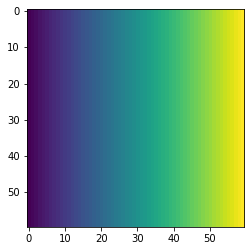

In [21]:
x = np.linspace(-2*np.pi, 2*np.pi, 60)
X,Y = np.meshgrid(x,x)

plt.imshow(X);

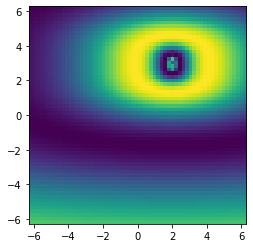

In [22]:
# Q and Z
Q = np.log((X-2)**2 + np.abs((Y-3)**3))
Z = np.sin(Q)

plt.imshow(Z, extent=[x[0],x[-1],x[0],x[-1]], origin="lower")
plt.show()

In [23]:
# Select random pixcels and convert to NaN
prop_bad_pixels = 0.1
num_elements = np.prod(Z.shape)
badpix_idx = np.random.rand(int(num_elements*prop_bad_pixels))*num_elements
badpix_idx = np.floor(badpix_idx).astype(int)
badpix_idx[0:25]

array([1254,  111,  625,  775, 1844, 2477,  594, 1204, 1839, 1429, 1131,
       2159, 2658,  957, 3566, 3580,  176, 2450, 3195, 3028, 1286, 1531,
       2345, 2615,  308])

In [24]:
# Convert from linear to matrix indices
i,j = np.unravel_index(badpix_idx,Z.shape)

# Copy original matrix
Z_bad = Z.copy()
Z_bad[i,j] = np.nan

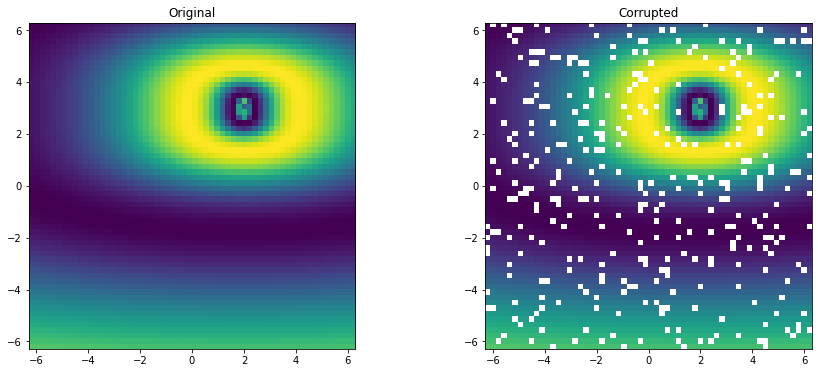

In [25]:
# Visuzlize
fig,ax = plt.subplots(1,2, figsize=(15,6))

ax[0].imshow(Z,extent=[x[0],x[-1],x[0],x[-1]], origin="lower")
ax[0].set_title("Original")

ax[1].imshow(Z_bad, extent=[x[0],x[-1],x[0],x[-1]], origin="lower")
ax[1].set_title("Corrupted")

plt.show()

In [26]:
# The 2D interpolation
# Find all the pixels that have been corrupted
# Although we know those pixels in this case, in reality we do not
# Find a list of good and bad pixcels
idx = np.where(np.isnan(Z_bad))
#row-indexes and column-indexes as two arrays

In [27]:
badidx_i, badidx_j = np.where(np.isnan(Z_bad))
goodidx_i, goodidx_j = np.where(np.isfinite(Z_bad))

In [28]:
# Set-up interpolation instance
Z_newpix = interpolate.griddata((goodidx_i, goodidx_j), Z_bad[goodidx_i, goodidx_j],
                    (badidx_i, badidx_j))
Z_newpix.shape # Values of pixcels where we want to interpolate

(340,)

In [29]:
Zinterp = Z_bad.copy()
Zinterp[badidx_i, badidx_j] = Z_newpix

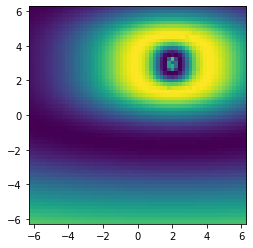

In [30]:
plt.imshow(Zinterp, extent=[x[0],x[-1],x[0],x[-1]], origin="lower");

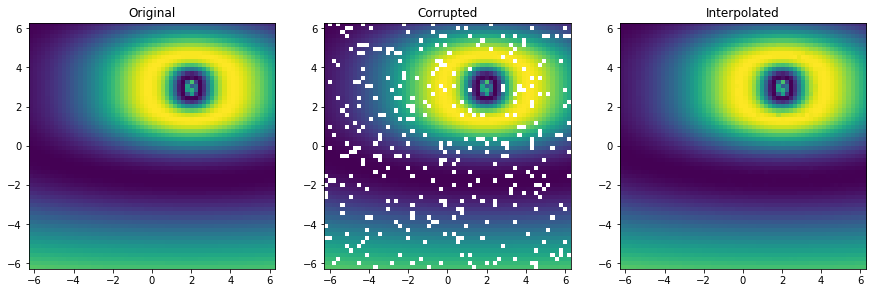

In [31]:
# Visuzlize all together
fig,ax = plt.subplots(1,3, figsize=(15,6))

ax[0].imshow(Z,extent=[x[0],x[-1],x[0],x[-1]], origin="lower")
ax[0].set_title("Original")

ax[1].imshow(Z_bad, extent=[x[0],x[-1],x[0],x[-1]], origin="lower")
ax[1].set_title("Corrupted")

ax[2].imshow(Zinterp, extent=[x[0],x[-1],x[0],x[-1]], origin="lower")
ax[2].set_title("Interpolated")
plt.show()

In [32]:
# Difference between the two
np.sum(Z) - np.sum(Zinterp)

0.4583037287271736

In [33]:
np.sum(Z) - np.nansum(Z_bad)

-76.61873800961416

In [34]:
np.sum(Zinterp) - np.nansum(Z_bad)

-77.07704173834134

## Draw a Necker Cube

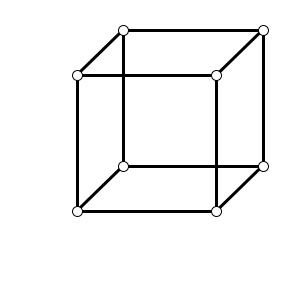

In [35]:
# Create one rectangle

# Offset parameter
o = 1/3

r1 = Rectangle((0,0),width=1, height=1, edgecolor="k", 
               linewidth=3,facecolor="none")

r2 = Rectangle((o,o),width=1, height=1, edgecolor="k", 
               linewidth=3,facecolor="none")

fig,ax = plt.subplots(figsize=(5,5))
ax.add_patch(r1)
ax.add_patch(r2)

ax.plot([0,o],[0,o], "k", linewidth=3)
ax.plot([0,o],[1,1+o], "k", linewidth=3)
ax.plot([1,1+o],[0,o], "k", linewidth=3)
ax.plot([1,1+o],[1,1+o], "k", linewidth=3)

ax.plot(0,0, "ko", markerfacecolor="w", markersize=10)
ax.plot(0,1, "ko", markerfacecolor="w", markersize=10)
ax.plot(1,0, "ko", markerfacecolor="w", markersize=10)
ax.plot(1,1, "ko", markerfacecolor="w", markersize=10)

ax.plot(o,1+o, "ko", markerfacecolor="w", markersize=10)
ax.plot(1+o,o, "ko", markerfacecolor="w", markersize=10)
ax.plot(o,o, "ko", markerfacecolor="w", markersize=10)
ax.plot(1+o,1+o, "ko", markerfacecolor="w", markersize=10)

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
plt.axis("off")
plt.show()

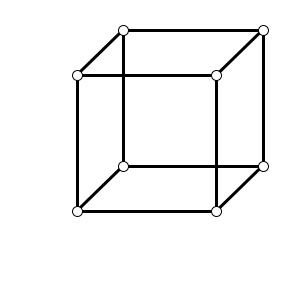

In [36]:
# Create the same figure using a for loop

# Offset parameter
o = 1/3

r1 = Rectangle((0,0),width=1, height=1, edgecolor="k", 
               linewidth=3,facecolor="none")

r2 = Rectangle((o,o),width=1, height=1, edgecolor="k", 
               linewidth=3,facecolor="none")

fig,ax = plt.subplots(figsize=(5,5))
ax.add_patch(r1)
ax.add_patch(r2)

ax.plot([0,o],[0,o], "k", linewidth=3)
ax.plot([0,o],[1,1+o], "k", linewidth=3)
ax.plot([1,1+o],[0,o], "k", linewidth=3)
ax.plot([1,1+o],[1,1+o], "k", linewidth=3)

corners = [[0,0],[0,1],[1,0],[1,1],[o,o],[o,1+o],[1+o,o],[1+o,1+o]]

for i in corners:
    ax.plot(i[0],i[1], "ko", markerfacecolor="w", markersize=10)

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
plt.axis("off")
plt.show()